### 用Julia求解常微分方程
例子：
求解洛伦兹系统

\begin{equation}
\begin{aligned}
&\frac{\mathrm{d} x}{\mathrm{~d} t}=\sigma(y-x), \\
&\frac{\mathrm{d} y}{\mathrm{~d} t}=x(\rho-z)-y, \\
&\frac{\mathrm{d} z}{\mathrm{~d} t}=x y-\beta z .
\end{aligned}
\end{equation}

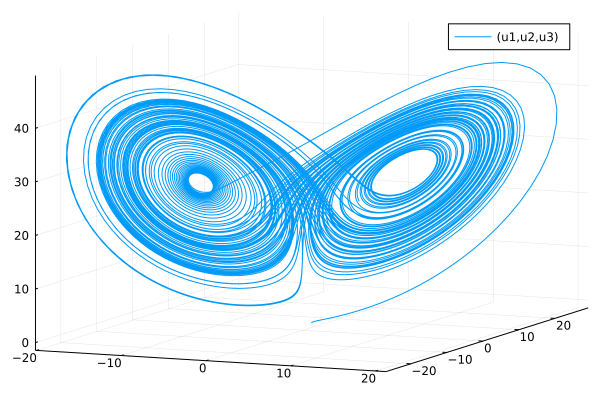

In [10]:
using OrdinaryDiffEq, Plots

function lorenz!(du,u,p,t) #du:增量，u:要求解的变量，p:微分方程参数，t常微分方程自变量
 du[1] = p[1]*(u[2]-u[1])
 du[2] = u[1]*(p[2]-u[3]) - u[2]
 du[3] = u[1]*u[2] - p[3]*u[3]
end

u0 = [1.0;0.0;0.0] #微分方程初始值
p = [10.0; 28.0; 8/3]
tspan = (0.0,100.0) #定义求解区间
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob, Tsit5())#利用Tsit5算法求解
plot(sol, vars=(1,2,3))

如何获得我所感兴趣的某一个时间点系统演化的结果？

In [24]:
sol = solve(prob, saveat=[0.5;1.4;86])

retcode: Success
Interpolation: 1st order linear
t: 3-element Vector{Float64}:
  0.5
  1.4
 86.0
u: 3-element Vector{Vector{Float64}}:
 [16.547527892481597, 6.164644099043539, 2.0055028769419483, 3.4934715204443862]
 [-40.878516678853636, -6.504710592035614, 6.9885408848574935, -12.685524825735952]
 [-1.706817261702773, -0.7363433173076961, 13.901001357833373, 19.64523221496446]

In [23]:
sol = solve(prob, saveat=1:10:100)

retcode: Success
Interpolation: 1st order linear
t: 10-element Vector{Float64}:
  1.0
 11.0
 21.0
 31.0
 41.0
 51.0
 61.0
 71.0
 81.0
 91.0
u: 10-element Vector{Vector{Float64}}:
 [-38.688638582530224, -2.389086310000447, 8.983834702706252, 11.352378509278422]
 [32.9941774308015, 6.295320638468439, 12.4961844467726, 17.8818904057396]
 [73.77818885222682, 0.9633186969458016, 3.528717071721556, 9.676676968468426]
 [94.30737595708194, -2.085811739646456, 5.697160671113528, -4.228278350441502]
 [43.577943773595166, 2.6352234702700272, 10.236718365015523, -16.266104136982257]
 [-27.774208059385998, -6.9395594409729355, 11.286665802756694, -16.884258587869343]
 [-69.60286494391231, 0.8672374699926996, 3.5646387582702452, -9.161586619689118]
 [-96.07443086507898, 3.9155602346868945, 6.759141186124059, 4.777553225081461]
 [-49.28250636129985, -2.232561376067641, 8.10522969651127, 17.59507830700612]
 [35.06734809897508, 5.966964769388397, 12.769247098699227, 18.183455908316496]

`saveat` 选项是用已经求解出来的解在自己想要的点上做插值得到最终的结果，并不是我们真正求解出来的值。如果系统有一定不连续性，或因为其他原因我们不能单纯用插值的方法得到目标点的值应该怎么办？
这时候我们应该用`tstops`的选项，它将在接近我们求解目标点的时候减小步长，直到正好走到目标点停止

In [31]:
solve(prob, tstops=[0.5;1.4;86])

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1499-element Vector{Float64}:
   0.0
   0.00014131524176735154
   0.0015544676594408668
   0.012956381792766277
   0.03826669818365798
   0.07852291314792542
   0.12210863575475983
   0.1715537420143117
   0.23112904632381737
   0.30252381117687105
   0.3838621392893297
   0.474050303535061
   0.5
   ⋮
  99.26709336968564
  99.3327598127726
  99.39865975196301
  99.4522466332276
  99.51561245266198
  99.58725956215426
  99.65414398430595
  99.73706315795309
  99.81111393172718
  99.88023607404814
  99.94377544127744
 100.0
u: 1499-element Vector{Vector{Float64}}:
 [2.0, 0.0, 0.0, 1.0]
 [1.9960454103704428, 0.0014132521265988688, 9.986094350108851e-8, 1.0002823510089436]
 [1.956746201469907, 0.01555657123298723, 1.2096178746316906e-5, 1.0030752466310615]
 [1.6563910957343146, 0.13029732534611174, 0.0008464888325952026, 1.023645017393648]
 [1.101194276

如果我想要非常高精度的解，或者我不在意解的精度，只想快点得到我最终结果的图怎么办？(给求解器设置abstol和reltol)

通常默认的值abstol=1e-6, reltol=1e-3
\begin{equation}
e r r_{\text {scaled }}=e r r /(\text { abstol }+\max (uprev, u) * \text { reltol })
\end{equation}
求解器会保证每步的$e r r_{\text {scaled }}$小于1

In [ ]:
sol = solve(prob, Tsit5(), reltol=1e-2, abstol=1e-3)

更多可以选择的调整和控制可见：https://diffeq.sciml.ai/latest/basics/common_solver_opts/

通常我们在求解常微分方程的时候，我们会将系统化成一阶常微分方程系统（即等式左边为t的一阶导数），
如果我们不想手动化简它，或者微分方程系统比较大，将方程化为一阶系统会耗费大量精力怎么办😰？
\begin{equation}
\begin{aligned}
&\frac{\mathrm{d^2} x}{\mathrm{~d} t^2}=\sigma(y-x), \\
&\frac{\mathrm{d} y}{\mathrm{~d} t}=x(\rho-z)-y, \\
&\frac{\mathrm{d} z}{\mathrm{~d} t}=x y-\beta z .
\end{aligned}
\end{equation}

使用ModelingToolkit

ref:https://mtk.sciml.ai/stable/tutorials/higher_order/

In [11]:
using ModelingToolkit, OrdinaryDiffEq

@parameters σ ρ β
@variables t x(t) y(t) z(t)
D = Differential(t)

eqs = [D(D(x)) ~ σ*(y-x),
       D(y) ~ x*(ρ-z)-y,
       D(z) ~ x*y - β*z]

@named sys = ODESystem(eqs)

Model sys with 3 equations
States (3):
  x(t)
  y(t)
  z(t)
Parameters (3):
  σ
  ρ
  β

将这个微分方程系统变为低阶系统：

length(sol) = 1495


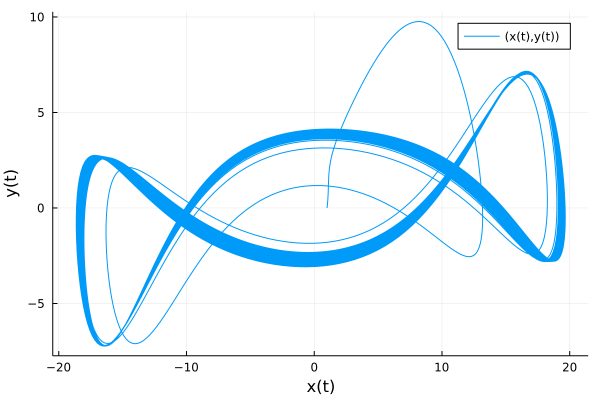

In [38]:
sys = ode_order_lowering(sys)
u0 = [D(x) => 2.0,
      x => 1.0,
      y => 0.0,
      z => 0.0]

p  = [σ => 28.0,
      ρ => 10.0,
      β => 8/3]

tspan = (0.0,100.0)
prob = ODEProblem(sys,u0,tspan,p,jac=true)
sol = solve(prob,Tsit5())
@show length(sol)
plot(sol,vars=(x,y))

我们之前所用的Tsit5是怎样一种算法？用我们在数值分析的课堂上都学过的显式Euler，隐式Euler和四阶Runge-Kutta方法求解ODE不可以吗？为什么还要开发其他方法呢？开发阶数更低的其他算法意义在何呢？

length(sol) = 1495


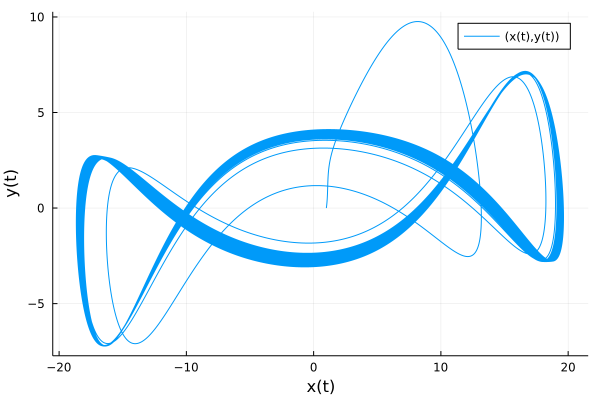

In [41]:
sol2 = solve(prob,RK4())
@show length(sol)
plot(sol2,vars=(x,y))

In [44]:
using BenchmarkTools
@benchmark solve(prob,RK4(),save_everystep=false)

BenchmarkTools.Trial: 4474 samples with 1 evaluation.
 Range (min … max):  1.022 ms …  2.361 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.079 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.113 ms ± 98.803 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▅▃ ▅█▄▃▆▅▄▄▃▃▂▂▂▂▁▁▁▁       ▁▂                             ▁
  ██▅█████████████████████▇█▇▇████▇█▇██▆▇▇▇▇▇▅▇▇▇▇▆▆▇▇▅▇▅▄▆▇ █
  1.02 ms      Histogram: log(frequency) by time     1.45 ms <

 Memory estimate: 5.05 KiB, allocs estimate: 39.

In [45]:
@benchmark solve(prob,Tsit5(),save_everystep=false)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  316.874 μs …   4.420 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     380.564 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   399.076 μs ± 123.169 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

   █▄                                                            
  ▆██▄▂▂▂▂▅▅▄▄▅▄▃▃▃▃▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  317 μs           Histogram: frequency by time          733 μs <

 Memory estimate: 6.78 KiB, allocs estimate: 42.

当算法的阶数$q$更高时，我们在每一步求解的时候通过控制误差$\mathcal{O}(h^{q-1})$得到的可允许的步长就更长，求解起来就会更有效率，但是更高阶的算法，在计算每步的时候所需时间往往也都会更长。

求解一个常微分方程问题的时候，我们的选择还依赖于这个方程的刚性(stiffness)程度来进行选择。刚性没有一个严格的定义，一个重要的标准是系统Jacobian矩阵的特征值。对于非线性方程组，我们可以将其线性化得到
\begin{equation}
y^{\prime}(t)=J y(t) .
\end{equation}

将Jacobian矩阵对角化或变为Jordan block，可以等价于只考虑一个简单线性方程
\begin{equation}
y^{\prime}(t)=\lambda y(t), \quad y(0)=1 .
\end{equation}
假设我们用固定步长的显式Euler法，我们可以得到
\begin{equation}
    y_{m+1} = y_{m} + h\lambda y_m = (1+h\lambda)^m y_0 \quad\text{(Dahlquist test equation)}
\end{equation}

很显然，原方程的解在$t\rightarrow \infty$的时候应该为0，然而显式Euler得到的方程必须在
$|1+h\lambda|<1$的时候才成立，我们将由$|Re(1+z)|<1$在复平面得到的区域称为稳定域(stability domain)，如果我们有$\lambda=-50$，步长必须满足 $0\leq h \leq \frac{2}{50}$ 才能得到一个合理的解，步长被限制在一个非常小的区域范围内。

如果是隐式格式的话呢？我们假设使用固定步长的隐式Euler法，可以得到
\begin{aligned}
    y_{m+1} &= y_{m} + h\lambda y_{m+1}\\
    y_{m+1} &= (\frac{1}{1-h\lambda})^my_{0}
\end{aligned}
我们可以看到Implicit Euler法的稳定域是整个左复平面！Dahlquist test equation对h的选择并没有影响。因此对于刚性问题，虽然使用隐式格式求解的时候我们一般需要利用牛顿迭代求解一个非线性代数方程组，但权衡下来我们使用隐式方法的求解效率依然更高。

ref:http://www.scholarpedia.org/article/Stiff_systems

自动检测问题的刚性:Solving Ordinary Differential Equations II (Ernst Hairer P21)

常微分方程求解器使用的算法最重要的两个家族是线性多步法和龙格库塔法。

其中Tsit5是一个非常有效率的五阶显式龙格库塔法，我们来尝试下用它来求解一个刚性问题

In [46]:
function rober(du,u,p,t)
  y₁,y₂,y₃ = u
  k₁,k₂,k₃ = p
  du[1] = -k₁*y₁+k₃*y₂*y₃
  du[2] =  k₁*y₁-k₂*y₂^2-k₃*y₂*y₃
  du[3] =  k₂*y₂^2
  nothing
end
prob = ODEProblem(rober,[1.0,0.0,0.0],(0.0,1e5),[0.04,3e7,1e4])
sol = solve(prob,Tsit5())

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/junpeng/.julia/packages/SciMLBase/OpCVa/src/integrator_interface.jl:331


retcode: MaxIters
Interpolation: specialized 4th order "free" interpolation
t: 999997-element Vector{Float64}:
   0.0
   0.0014148468219250373
   0.0020449182545311173
   0.0031082402716566307
   0.004077787050059496
   0.005515332443361059
   0.007190040962774541
   0.009125372578778032
   0.011053912492732977
   0.012779077276958607
   0.014024022307121159
   0.015243850666599433
   0.01653506083093412
   ⋮
 627.2190396080226
 627.2195546456298
 627.2200696831143
 627.2205847204418
 627.2210997576807
 627.221614794865
 627.2221298319947
 627.2226448690358
 627.2231599060223
 627.2236749429201
 627.2241899796951
 627.2247050163814
u: 999997-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9999434113193613, 3.283958829839966e-5, 2.374909234028646e-5]
 [0.9999182177783585, 3.5542680136344576e-5, 4.6239541505020636e-5]
 [0.999875715036629, 3.630246933484973e-5, 8.798249403609502e-5]
 [0.9998369766077329, 3.646280308115454e-5, 0.00012656058918590176]
 [0.9997795672444667, 3.646643085

如果我们用最简单的隐式Euler格式去求解

In [47]:
function rober(du,u,p,t)
  y₁,y₂,y₃ = u
  k₁,k₂,k₃ = p
  du[1] = -k₁*y₁+k₃*y₂*y₃
  du[2] =  k₁*y₁-k₂*y₂^2-k₃*y₂*y₃
  du[3] =  k₂*y₂^2
  nothing
end
prob = ODEProblem(rober,[1.0,0.0,0.0],(0.0,1e5),[0.04,3e7,1e4])
sol = solve(prob,ImplicitEuler())

retcode: Success
Interpolation: 3rd order Hermite
t: 363-element Vector{Float64}:
      0.0
      1.0215736813606681e-9
      1.2258884176328018e-9
      3.269035780354138e-9
      2.3700509407567496e-8
      2.2801524567970107e-7
      2.2711626084010365e-6
      2.270263623561439e-5
      0.00019230207616389763
      0.00022622196414955428
      0.0004957884019103124
      0.000549701689462464
      0.0007816788344483188
      ⋮
  78897.4806796564
  81895.4122884237
  82494.99861017716
  85618.89563319685
  86243.67503780079
  89500.43582877738
  90151.7879869727
  93546.49317288218
  94225.43421006408
  97986.50659344744
  98738.72107012411
 100000.0
u: 363-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.999999999959137, 4.0862947252705774e-11, 5.1174113091860296e-23]
 [0.9999999999509644, 4.903553670318014e-11, 6.140893571020672e-23]
 [0.9999999998692386, 1.3076143120029892e-10, 1.1094547717093153e-21]
 [0.9999999990519797, 9.480203749631761e-10, 5.519885464992707e-19]
 [0.99

OrdinaryDiffEq.jl涵盖了相当多的ODE solver，适用于不同的问题类型，对于普通的简单问题，我们可以直接使用DifferentialEquations.jl帮我们自动决定算法

In [48]:
using DifferentialEquations
function rober(du,u,p,t)
  y₁,y₂,y₃ = u
  k₁,k₂,k₃ = p
  du[1] = -k₁*y₁+k₃*y₂*y₃
  du[2] =  k₁*y₁-k₂*y₂^2-k₃*y₂*y₃
  du[3] =  k₂*y₂^2
  nothing
end
prob = ODEProblem(rober,[1.0,0.0,0.0],(0.0,1e5),[0.04,3e7,1e4])
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 74-element Vector{Float64}:
      0.0
      0.0014148468219250373
      0.0020449182545311173
      0.0031082402716566307
      0.004077787050059496
      0.005515332443361059
      0.007190040962774541
      0.009125372578778032
      0.011053912492732977
      0.012779077276958607
      0.014024022307121159
      0.015243850666599433
      0.01653506083093412
      ⋮
  14117.302631950583
  17350.73455308948
  21224.101891819373
  25851.070227357166
  31365.38089761798
  37924.424727281454
  45714.16453445824
  54954.71318269911
  65907.84615709518
  78886.13983396716
  94265.3856963418
 100000.0
u: 74-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9999434113193613, 3.283958829839966e-5, 2.374909234028646e-5]
 [0.9999182177783585, 3.5542680136344576e-5, 4.6239541505020636e-5]
 [0.999875715036629, 3.630246933484973e-5, 8.798249403609502e-5]
 [

In [49]:
sol.alg

CompositeAlgorithm{Tuple{Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rosenbrock23{3, false, DefaultLinSolve, Val{:forward}}}, OrdinaryDiffEq.AutoSwitchCache{Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rosenbrock23{0, false, DefaultLinSolve, Val{:forward}}, Rational{Int64}, Int64}}((Tsit5(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false)), Rosenbrock23{3, false, DefaultLinSolve, Val{:forward}}(DefaultLinSolve(nothing, nothing, nothing))), OrdinaryDiffEq.AutoSwitchCache{Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rosenbrock23{0, false, DefaultLinSolve, Val{:forward}}, Rational{Int64}, Int64}(61, 0, Tsit5(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false)), Rosenbrock23{0, false, DefaultLinSolve, Val{:forward}}(DefaultLinSolve(nothin

OrdinaryDiffEq.jl所有的solver和推荐方法可见：https://diffeq.sciml.ai/stable/solvers/ode_solve/;

https://www.zhihu.com/question/393977320/answer/1249777860

对不同问题类型的solver benchmark: https://github.com/SciML/SciMLBenchmarks.jl

对于非刚性的问题，我们通常使用Tsit5算法就已经足够，如果对解的精度有很高要求，可以考虑Vern7(9)。对于小型的刚性问题，我们可以考虑使用Rosenbrock23或Rodas类型的solver，在较为大型的ODE问题下，我们可以考虑使用基于多步法的solver(Julia原生的QNDF，TRBDF2，或CVODE/LSODA)，或SDIRK类型的solver（例如KenCarp4，只有对角线有系数的RK方法，可以在求解牛顿迭代的时候很有效率)。

如果我们对想求得的解有一定要求的话，比如求得的解依然满足某个守恒律或保有某种性质等等，需要一些特殊的求解算法。例如在多体运动中想守恒哈密顿量的话，需要用到sympletic integrator，求解Hyperbolic PDE离散出来的方程的时候，为了满足阶数要求和TVD等性质的时候，需要用到SSP(Strong stability preserving) RK。